# Imports

In [82]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.cluster import KMeans, AgglomerativeClustering 
from scipy.cluster import hierarchy
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist
import plotly.express as px 
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer, silhouette_visualizer
from sklearn.neighbors import NearestCentroid 
import pickle
import matplotlib as mpl
mpl.rcParams['font.size'] = 8
import warnings
warnings.filterwarnings("ignore")

# EDA Catalogue

In [83]:
path_to_catalogue = "./Données communes/Catalogue.csv"
catalogue = pd.read_csv(path_to_catalogue, encoding="ISO-8859-1")

In [84]:
print(catalogue.shape)
print(catalogue.dtypes)
catalogue.sample(5)

(270, 9)
marque       object
nom          object
puissance     int64
longueur     object
nbPlaces      int64
nbPortes      int64
couleur      object
occasion       bool
prix          int64
dtype: object


,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
208,Ford,Mondeo 1.8,125,longue,5,5,gris,False,23900
237,BMW,M5,507,très longue,5,5,gris,True,66360
167,Lancia,Ypsilon 1.4 16V,90,courte,5,3,gris,False,13500
40,Volkswagen,Golf 2.0 FSI,150,moyenne,5,5,rouge,True,16029
76,Renault,Vel Satis 3.5 V6,245,très longue,5,5,bleu,False,49200


<font color="blue" size=5> Le dataset catalogue contient 270 lignes et 9 colonnes. Les données semblent être au bon format </font>

### Stats descriptive des variables numériques 

In [85]:
#statistiques descriptives des variables numériques
catalogue.describe()

,puissance,nbPlaces,nbPortes,prix
count,270.000000,270.000000,270.000000,270.000000
mean,157.592593,5.222222,4.814815,26668.055556
std,90.551289,0.629707,0.580798,19050.121112
min,55.000000,5.000000,3.000000,7500.000000
25%,109.000000,5.000000,5.000000,16029.000000
50%,147.000000,5.000000,5.000000,20597.500000
75%,170.000000,5.000000,5.000000,30000.000000
max,507.000000,7.000000,5.000000,101300.000000


### Stats descriptive des variables catégorielles

In [86]:
#statistiques descriptives des variables catégorielles
catalogue.describe(exclude='number')

,marque,nom,longueur,couleur,occasion
count,270,270,270,270,270
unique,21,32,4,5,2
top,Renault,S80 T6,longue,blanc,False
freq,40,10,90,54,160


# Détection de valeurs manquantes 

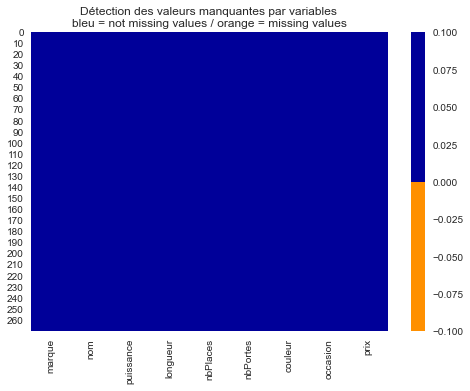

In [87]:
colours =  ["#ff9000", "#000099"]
sns.heatmap(catalogue.isnull() , cmap=sns.color_palette(colours))
plt.title('Détection des valeurs manquantes par variables \nbleu = not missing values / orange = missing values')
plt.show()

<font color=blue size=5> Aucune valeur manquante détectée </font>

### Vérification des valeurs des différentes variables 

In [88]:
catalogue.nom.unique()

array(['S80 T6', 'Touran 2.0 FSI', 'Polo 1.2 6V', 'New Beatle 1.8',
       'Golf 2.0 FSI', 'Superb 2.8 V6', 'Toledo 1.6', '9.3 1.8T',
       'Vel Satis 3.5 V6', 'Megane 2.0 16V', 'Laguna 2.0T', 'Espace 2.0T',
       '1007 1.4', 'Primera 1.6', 'Maxima 3.0 V6', 'Almera 1.8',
       'Copper 1.6 16V', 'S500', 'A200', 'Ypsilon 1.4 16V', 'Picanto 1.1',
       'X-Type 2.5 V6', 'Matrix 1.6', 'FR-V 1.7', 'Mondeo 1.8',
       'Croma 2.2', 'Cuore 1.0', 'Logan 1.6 MPI', 'M5', '120i',
       'A3 2.0 FSI', 'A2 1.4'], dtype=object)

In [89]:
catalogue.puissance.unique()

array([272, 150,  55, 110, 193, 102, 245, 135, 170, 165,  75, 109, 200,
       115, 306, 136,  90,  65, 197, 103, 125, 147,  58, 507], dtype=int64)

In [90]:
catalogue.longueur.unique()

array(['très longue', 'longue', 'courte', 'moyenne'], dtype=object)

In [91]:
catalogue.couleur.unique()

array(['blanc', 'noir', 'rouge', 'gris', 'bleu'], dtype=object)

In [92]:
catalogue.nbPlaces.unique()

array([5, 7], dtype=int64)

In [93]:
catalogue.nbPortes.unique()

array([5, 3], dtype=int64)

In [94]:
catalogue.occasion.unique()

array([False,  True])

In [95]:
catalogue.prix.unique()

array([ 50500,  35350,  27340,  19138,   8540,  12200,  18641,  26630,
        16029,  22900,  31790,  18880,  27020,  38600,  34440,  49200,
        15644,  22350,  19110,  27300,  21245,  30350,   9625,  13750,
        18650,  30000,  16450,  12740,  18200,  70910, 101300,  25900,
        18130,  13500,   9450,   8990,  37100,  25970,  15960,  19550,
        16730,  23900,  17346,  24780,   8850,   7500,  66360,  94800,
        25060,  35800,  19950,  28500,  12817,  18310], dtype=int64)

<font color="blue" size=5> Les données du catalogue sont propres </font>

In [96]:
# catalogue.occasion = np.where(catalogue.occasion, 1,0)

# Visualisation des données

## Variables couleur, nbPortes, nbPlaces

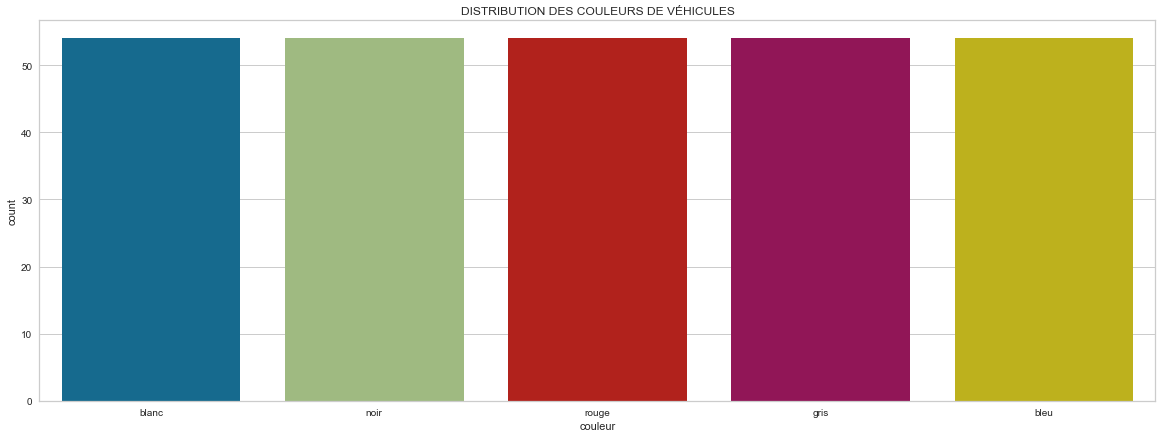

In [97]:
plt.figure(figsize=(20, 7))
sns.countplot(data=catalogue, x="couleur")
plt.title("distribution des couleurs de véhicules".upper())
plt.show()

<font color="blue" size=5> On constate une parafaite distribution de la variable couleur </font>

### Déterminer les véhicules (mêmes caractéristiques - sauf la couleur) qui ne sont pas en 5 coloris 

In [98]:
#Vérifier si tous les véhicules sont effectivement en 5 coloris
catalogue.groupby(catalogue.columns[catalogue.columns != "couleur"].tolist()).apply(lambda x : x.couleur.isin(catalogue.couleur.unique()).all()).all()

True

In [99]:
# Déterminer les types de véhicules ((mêmes caractéristiques - sauf la couleur)) qui ne sont pas en 5 coloris
(catalogue.groupby(catalogue.columns[catalogue.columns != "couleur"].tolist()).count().reset_index().couleur != 5 ).sum()

0

<font color="blue" size=3> Tous les véhicules dans ce catalogue sont en 5 coloris. Nous décidons donc de supprimer la variable couleur pour le clustering car elle n'est pas discriminante. En effet, on pourrait proposer n'importe quel véhicule à un client si ce dernier avait la couleur comme critère de véhicule. </font>

In [100]:
catalogue_uncolored = catalogue.groupby(catalogue.columns[catalogue.columns != "couleur"].tolist()).count().reset_index().drop(columns="couleur")

<font color=blue size=3>
Ainsi, pour ce faire, nous regroupons les véhicules sur toutes les autres caractéristiques hors-mi la couleur puis nous retirons la variable couleur. Ce qui nous fournit, in fine, 54 lignes contre 270 initialement </font>

In [101]:
print("Les dimensions de notre nouveau dataframe : ", catalogue_uncolored.shape)
catalogue_uncolored.head(5)

Les dimensions de notre nouveau dataframe :  (54, 8)


,marque,nom,puissance,longueur,nbPlaces,nbPortes,occasion,prix
0,Audi,A2 1.4,75,courte,5,5,False,18310
1,Audi,A2 1.4,75,courte,5,5,True,12817
2,Audi,A3 2.0 FSI,150,moyenne,5,5,False,28500
3,Audi,A3 2.0 FSI,150,moyenne,5,5,True,19950
4,BMW,120i,150,moyenne,5,5,False,35800


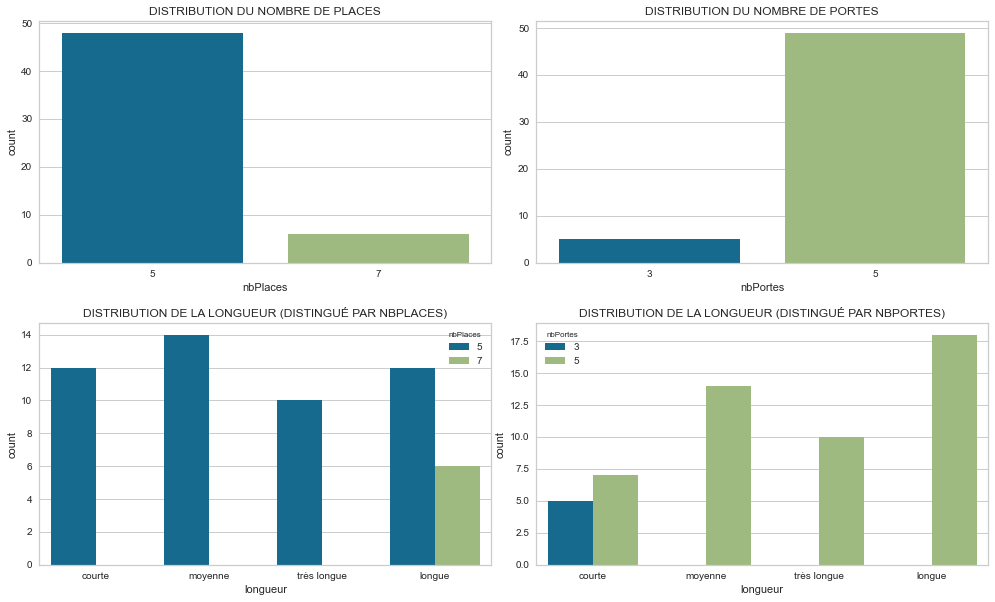

In [102]:
fig, axs = plt.subplots(2, 2, figsize=(17, 10))

axs[0,0].set_title("distribution du nombre de places".upper())
sns.countplot(data=catalogue_uncolored, x="nbPlaces",  ax=axs[0,0])

axs[0,1].set_title("distribution du nombre de portes".upper())
sns.countplot(data=catalogue_uncolored, x="nbPortes", ax=axs[0,1])

axs[1,0].set_title("distribution de la longueur (distingué par nbPlaces)".upper())
sns.countplot(data=catalogue_uncolored, x="longueur", hue="nbPlaces", ax=axs[1,0]) 

axs[1,1].set_title("distribution de la longueur (distingué par nbPortes)".upper())
sns.countplot(data=catalogue_uncolored, x="longueur", hue="nbPortes", ax=axs[1,1]) 

plt.subplots_adjust(wspace=0.1, hspace=0.25)
plt.show()

In [103]:
catalogue_uncolored[catalogue_uncolored.nbPlaces==7]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,occasion,prix
14,Honda,FR-V 1.7,125,longue,7,5,False,19550
15,Hyundaï,Matrix 1.6,103,longue,7,5,False,15960
32,Renault,Espace 2.0T,165,longue,7,5,False,30350
33,Renault,Espace 2.0T,165,longue,7,5,True,21245
50,Volkswagen,Touran 2.0 FSI,150,longue,7,5,False,27340
51,Volkswagen,Touran 2.0 FSI,150,longue,7,5,True,19138


In [104]:
catalogue_uncolored[catalogue_uncolored.nbPortes==3]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,occasion,prix
9,Daihatsu,Cuore 1.0,58,courte,5,3,False,8850
19,Lancia,Ypsilon 1.4 16V,90,courte,5,3,False,13500
20,Lancia,Ypsilon 1.4 16V,90,courte,5,3,True,9450
48,Volkswagen,Polo 1.2 6V,55,courte,5,3,False,12200
49,Volkswagen,Polo 1.2 6V,55,courte,5,3,True,8540


<font color=blue size=4> 
On note des proportions très faibles des véhicules à 7 places ou des véhicules à 3 portes
    
Aussi, seuls les véhicules longs peuvent avoir 7 places et seuls les véhicules courts peuvent avoir 3 portes. 
</font>

## Les variables prix et puissance

[]

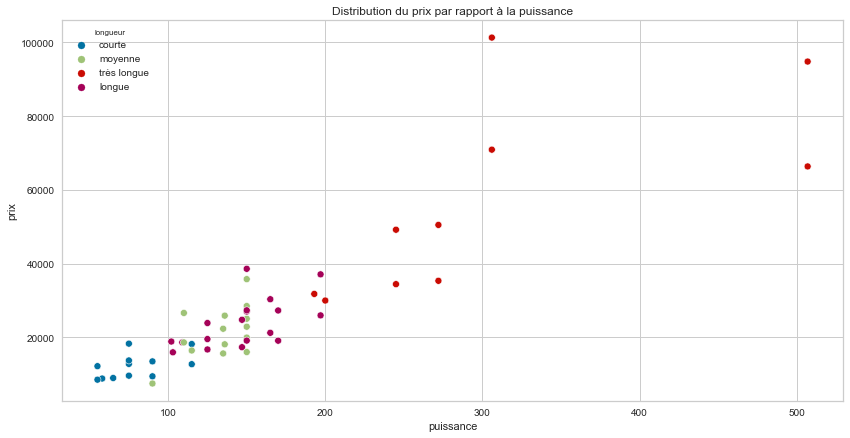

In [105]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=catalogue_uncolored, x="puissance", y="prix", hue="longueur")
plt.title("Distribution du prix par rapport à la puissance")
plt.plot()

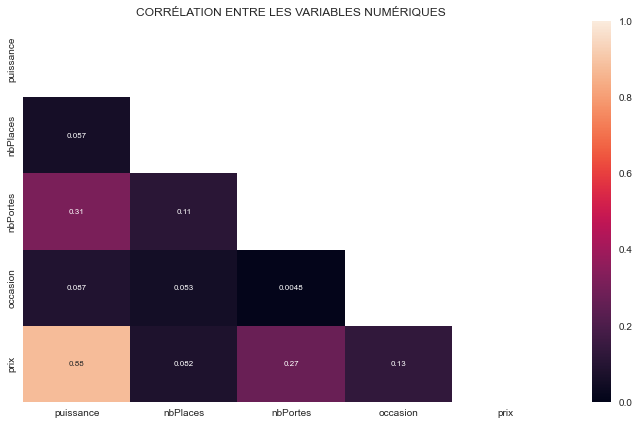

In [106]:
plt.figure(figsize=(12,7))
plt.title("Corrélation entre les variables numériques".upper())
mask = np.triu(np.ones_like(catalogue_uncolored.corr())) 
sns.heatmap(catalogue_uncolored.corr().abs(), annot=True, mask=mask, vmin=0, vmax=1)
plt.show()

<font color=blue size=5> Les variables prix et puissance sont fortement correlées. </font>

In [107]:
catalogue_uncolored.occasion.value_counts(True)

False    0.592593
True     0.407407
Name: occasion, dtype: float64

<font color=blue size=5> 40% des lignes environ désignent des véhicules d'occasion tandis que près de 60% ne sont pas d'ocassion. </font>

<font color=blue size=5> Pour la majorité des véhicules du catalogue, il existe une neuve et une d'occasion </font>

In [108]:
tmp = catalogue_uncolored.groupby(catalogue_uncolored.columns[~catalogue_uncolored.columns.isin(["occasion", "prix"])].tolist()).count().reset_index() 
print(f"{(tmp[tmp.occasion==2].shape[0]*2 / catalogue_uncolored.shape[0])*100:.0f}% des lignes désignent des véhicules qui ont une version neuve et une d'occasion")

81% des lignes désignent des véhicules qui ont une version neuve et une d'occasion


<font color=blue size=5> 81% des lignes désignent des véhicules qui ont une version neuve et une d'occasion </font>

In [109]:
# Les lignes désignant des véhicules qui n'ont qu'une valeur pour la variable occasion
print("Les lignes désignant des véhicules qui n'ont qu'une valeur pour la variable occasion")
catalogue_uncolored[~catalogue_uncolored.nom.isin(catalogue_uncolored[catalogue_uncolored.nom.duplicated()].nom)]

Les lignes désignant des véhicules qui n'ont qu'une valeur pour la variable occasion


,marque,nom,puissance,longueur,nbPlaces,nbPortes,occasion,prix
8,Dacia,Logan 1.6 MPI,90,moyenne,5,5,False,7500
9,Daihatsu,Cuore 1.0,58,courte,5,3,False,8850
14,Honda,FR-V 1.7,125,longue,7,5,False,19550
15,Hyundaï,Matrix 1.6,103,longue,7,5,False,15960
18,Kia,Picanto 1.1,65,courte,5,5,False,8990
27,Nissan,Almera 1.8,115,moyenne,5,5,False,16450
28,Nissan,Maxima 3.0 V6,200,très longue,5,5,False,30000
29,Nissan,Primera 1.6,109,longue,5,5,False,18650
42,Seat,Toledo 1.6,102,longue,5,5,False,18880
43,Skoda,Superb 2.8 V6,193,très longue,5,5,False,31790


<font color=blue size=5> Tandis que les 19% restant sont tous des véhicules neufs </font>

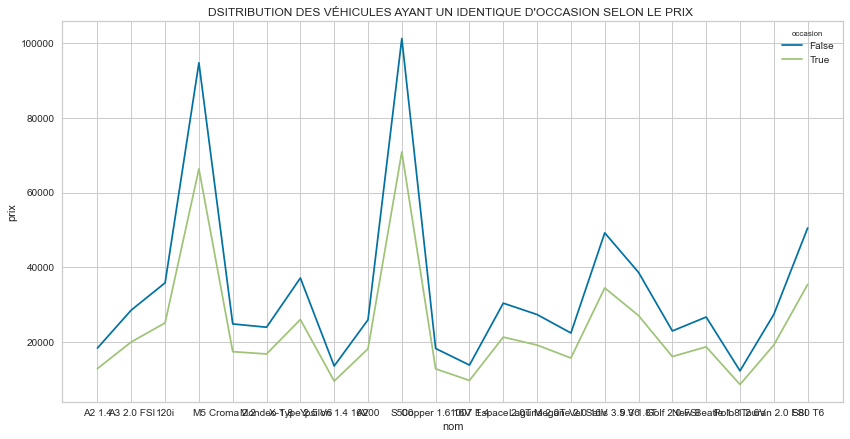

In [110]:
# Filtre : obtenir uniquement les véhicules qui ont un modèle d'occasion et un autre neuf
occasions = catalogue_uncolored[catalogue_uncolored.nom.isin(catalogue_uncolored[catalogue_uncolored.nom.duplicated()].nom)]

# afficher le graphique des prix distingué par la variable catégorie
plt.figure(figsize=(14,7))
sns.lineplot(data=occasions, x="nom", y="prix", hue="occasion")
plt.title("Dsitribution des véhicules ayant un identique d'occasion selon le prix ".upper())
plt.show()

<font color=blue size=4>Nous pouvons aussi constater que la valeur de la variable occasion a une influence sur le prix d'un même modèle de véhicule. En effet, pour deux véhicules identiques sur les autres caractéristiques (hors-mi  prix et occasion), le prix sera moindre pour celui qui est d'occasion. 
</font>

<font color=blue size=4> Vu l'influence qu'à la variable occasion sur le prix, nous décidons, pour le clustering, de séparer notre dataframe en deux groupes : celui des véhicules d'occasion et celui des véhicules qui sont neufs (pas d'occasion) </font>

In [111]:
catalogue_occasion = catalogue_uncolored[catalogue_uncolored.occasion].drop(columns=["occasion"])
catalogue_neuf = catalogue_uncolored[~catalogue_uncolored.occasion].drop(columns=["occasion"]) 

In [112]:
print("Les véhicules neufs : ")
print("shape :", catalogue_neuf.shape)
print("Nombre de nom unique :", catalogue_neuf.nom.nunique())

print('='*30)

print("Les véhicules d'occasion : ")
print("shape :", catalogue_occasion.shape)
print("Nombre de nom unique :", catalogue_occasion.nom.nunique())


Les véhicules neufs : 
shape : (32, 7)
Nombre de nom unique : 32
Les véhicules d'occasion : 
shape : (22, 7)
Nombre de nom unique : 22


<font color=blue size=4> En effectuant ces opérations, la variable nom n'est plus en doublon dans l'un ou l'autre des dataframe. Elle se comporte comme un simple identifiant de chaque ligne. **Nous pouvons donc la supprimer des dataframes** </font>

In [113]:
catalogue_neuf = catalogue_neuf.drop(columns="nom")
catalogue_occasion = catalogue_occasion.drop(columns="nom")

# <font color="blue"> Finalement, pour la détermination des catégories de véhicules, nous utiliserons que les variables suivantes : 
- la marque
- la puissance
- la longueur
- le nombre de places 
- le nombre de portes
- le prix
 </font>

In [114]:
## Save the catalogue dataframe before clustering 
with open("catalogue_uncolored.pkl", 'wb') as file:
    pickle.dump(catalogue_uncolored, file)

In [115]:
catalogue_uncolored.to_csv('catalogue_uncolored.csv')

# Clustering 

In [116]:
var = ["marque", "puissance", "longueur", "nbPlaces", "nbPortes", "prix"]
X_catalogue_neuf = catalogue_neuf[var].copy() 
X_catalogue_occasion = catalogue_occasion[var].copy() 

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="error"), ["marque", "longueur"]), 
    ('ohe_binary', OneHotEncoder(drop = "if_binary", handle_unknown="error"), ["nbPlaces", "nbPortes"]),
    ('scaling', StandardScaler(), ["puissance", "prix"])
])

pipe_ohe_scaling_catalogue = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer) 
])

X_catalogue_neuf = pipe_ohe_scaling_catalogue.fit_transform(X_catalogue_neuf) 
X_catalogue_occasion = pipe_ohe_scaling_catalogue.fit_transform(X_catalogue_occasion) 

# with open('data_preprocessor_catalogue.pkl', 'wb') as file:
#     pickle.dump(pipe_ohe_scaling_catalogue, file)

In [117]:
print(X_catalogue_neuf.shape)
print(X_catalogue_occasion.shape)

(32, 29)
(22, 21)


<font color=blue size=3>
    Ne sachant pas à priori le nombre de regroupement des véhicules, nous choisissons de faire un clustering hiérarchique ascendant afin d'obtenir un dendogramme et identifier le nombre de regroupement naturel.
</font>

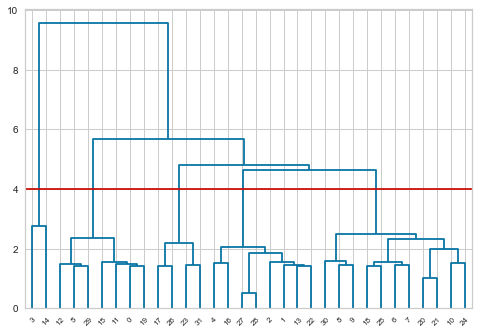

In [118]:
hierarchy.dendrogram(hierarchy.linkage(pdist(X_catalogue_neuf.todense()) , method='ward'), color_threshold=0.1)
plt.axhline(4, c="r") 
plt.show()

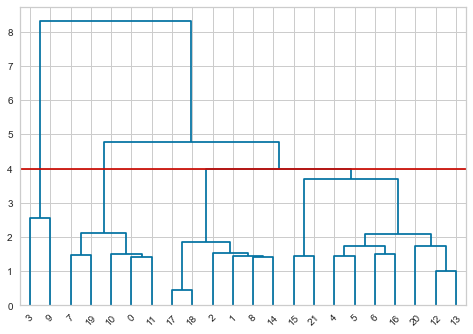

In [119]:
hierarchy.dendrogram(hierarchy.linkage(pdist(X_catalogue_occasion.todense()) , method='ward'), color_threshold=0.1)
plt.axhline(4, c="r") 
plt.show()

<font color=blue size=4> Nous admettons la coupure à l'ordonée égale à 4 et supposons que les véhicules sont regroupés selon 5 groupes et cela peu importe qu'on ait des véhicules neufs ou pas </font>

In [120]:
catalogue_uncolored.occasion = np.where(catalogue_uncolored.occasion, 1,0)

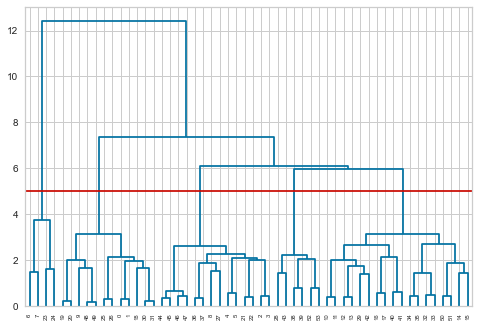

In [121]:
X_catalogue_uncolored = catalogue_uncolored[var + ['occasion']].copy()
X_catalogue_uncolored = pipe_ohe_scaling_catalogue.fit_transform(X_catalogue_uncolored) 

#plot dendogram
hierarchy.dendrogram(hierarchy.linkage(pdist(X_catalogue_uncolored.todense()) , method='ward'), color_threshold=0.1)
plt.axhline(5, c="r") 
plt.show()

<font color=blue size=4> 
Ainsi, en ne séparant pas les véhicules neufs des occasions, nous admettons également 5 groupes de véhicules. Par conséquent nous décidons de continuer à travailler avec ce dataframe contenant la variable couleur. Néanmoins nous faisons le choix de ne pas tenir compte du nom du véhicule lors du clustering.
</font>

# Algorithmes de clustering

## Kmeans

#### Mise en oeuvre de la méthode elbow 

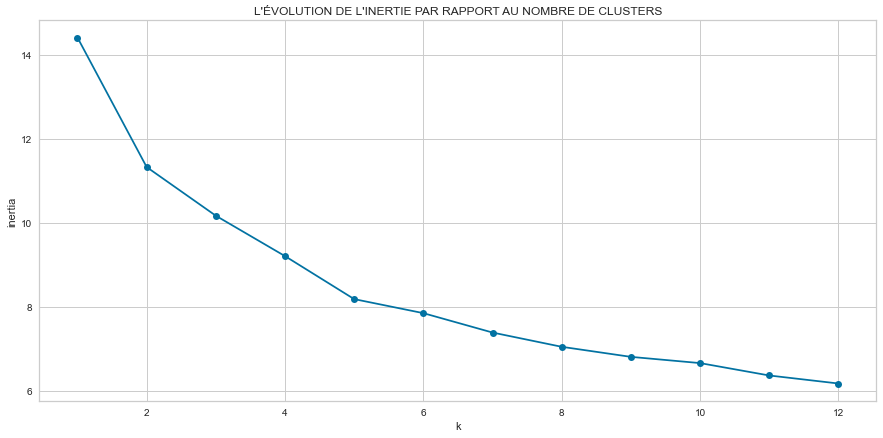

In [122]:
nb_clusters = 13
inertia = []
kmeans_instances = []
for k in range(1, nb_clusters):
    kmeans_instances.append(KMeans(n_clusters=k, random_state=42, algorithm="auto"))
    kmeans_instances[k-1].fit_transform(X_catalogue_uncolored)
    inertia.append(np.sqrt(kmeans_instances[k-1].inertia_))

plt.figure(figsize=(15, 7))
plt.title("L'évolution de l'inertie par rapport au nombre de clusters".upper())
plt.plot(range(1, nb_clusters), inertia, marker='o');
plt.grid(True)
plt.xlabel('k')
plt.ylabel('inertia');
# plt.text(7.2, 4.5393, "7ith", ) 
# plt.axhline(4.9, c="r") 
# plt.axvline(5, c="r")

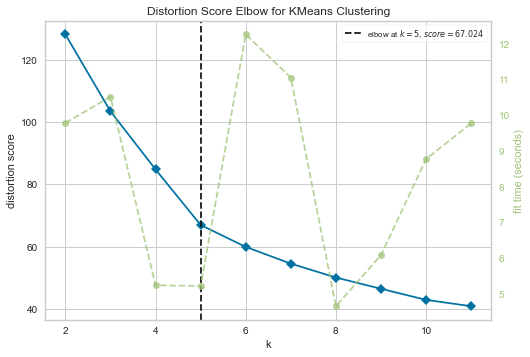

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [123]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X_catalogue_uncolored.toarray())       
visualizer.show()

 <font color=blue size=4> En analysant le graphique ci-dessus, nous pouvons dire que le nombre de cluster optimal se situe entre 4 et 7 : plus précisément égal à 5 grâce à la méthode elbow</font>


# Agglomerative clustering

In [124]:
ac_4 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward", compute_distances=True).fit(X_catalogue_uncolored.toarray())
ac_5 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward", compute_distances=True).fit(X_catalogue_uncolored.toarray())
ac_6 = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward", compute_distances=True).fit(X_catalogue_uncolored.toarray())
ac_7 = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="ward", compute_distances=True).fit(X_catalogue_uncolored.toarray())
ac_8 = AgglomerativeClustering(n_clusters=8, affinity="euclidean", linkage="ward", compute_distances=True).fit(X_catalogue_uncolored.toarray())

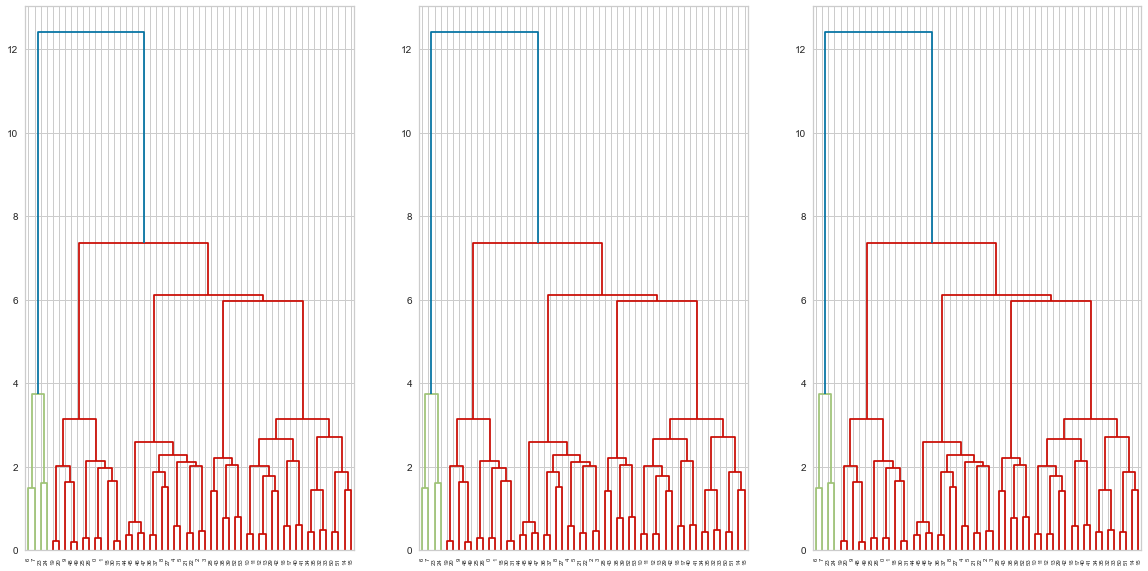

In [125]:
def plot_dendrogram(model, ax, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    hierarchy.dendrogram(linkage_matrix, ax=ax,  **kwargs) 

fig, axs = plt.subplots(1, 3, figsize=(20, 10))

plot_dendrogram(ac_4, ax=axs[0], truncate_mode="level") 
plot_dendrogram(ac_5, ax=axs[1], truncate_mode="level")
plot_dendrogram(ac_6, ax=axs[2], truncate_mode="level") 

# Silhouette

## Silhouette - K-Means

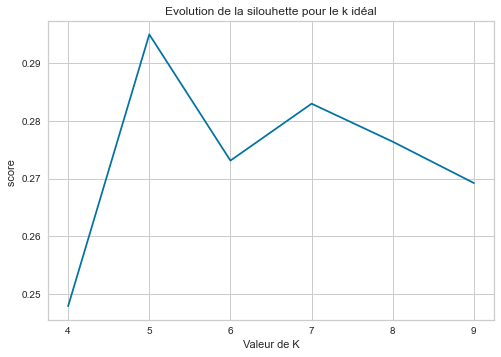

In [126]:
range_n_clusters = range(4,10)
silhouette_avg = [] 
for num_clusters in range_n_clusters: 
    cluster_labels = kmeans_instances[num_clusters-1].labels_
     # silhouette score
    silhouette_avg.append(silhouette_score(X_catalogue_uncolored, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Valeur de K') 
plt.ylabel('score ') 
plt.title('Evolution de la silouhette pour le k idéal') 
plt.grid(True)
plt.show()

## Silhouette - Agglomerative clustering

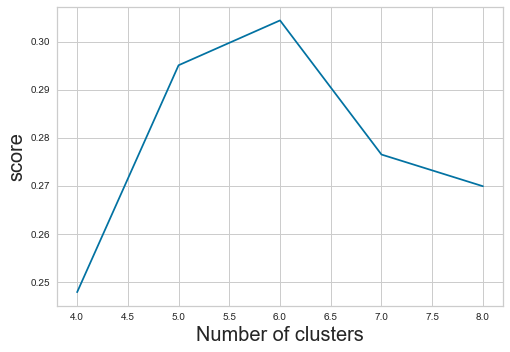

In [127]:
k = range(4, 9)

ac_list = [ac_4 ,ac_5, ac_6, ac_7, ac_8]

# Appending the silhouette scores
silhouette_scores = {}
silhouette_scores.fromkeys(k)

for i,j in enumerate(k):
    silhouette_scores[j] = silhouette_score(X_catalogue_uncolored, ac_list[i].labels_) 
# Plotting
y = list(silhouette_scores.values())
plt.plot(k, y)
plt.grid(True)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('score', fontsize = 20)
plt.show()

### Plot des résultats des deux méthodes (Kmeans & Agglomerative Clusrering) sur le même graphique

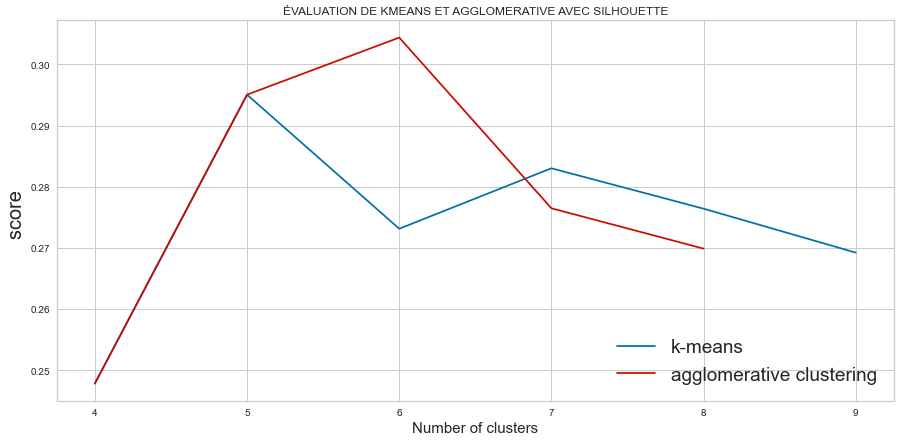

In [128]:
plt.figure(figsize=(15,7))
plt.plot(range_n_clusters,silhouette_avg, '-b', label="k-means")
plt.plot(k, y, '-r', label="agglomerative clustering")
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('score ', fontsize=20) 
plt.legend(loc="lower right", fontsize=19)
plt.title("évaluation de kmeans et agglomerative avec silhouette".upper())
plt.show()

<font color=blue size=3>
    Avec la méthode Elbow et le score de la silhouette, Kmeans nous fournit toujours k=5. Néanmoins, l'AgglomerativeClustering nous fait supposer 5 clusters à partir du dendogramme mais indique 6 clusters avec le score de la silhouette 
</font>

# Réduction de dimensions et visualisation 

## PCA

In [129]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_catalogue_uncolored.toarray())

In [130]:
print(f"Pourcentage d'informations conservées avec les 2 premières composantes : {pca3.explained_variance_ratio_[:2].sum()*100:.2f}%")

Pourcentage d'informations conservées avec les 2 premières composantes : 63.21%


<font color="blue"> Clusters avec K-Means</font>

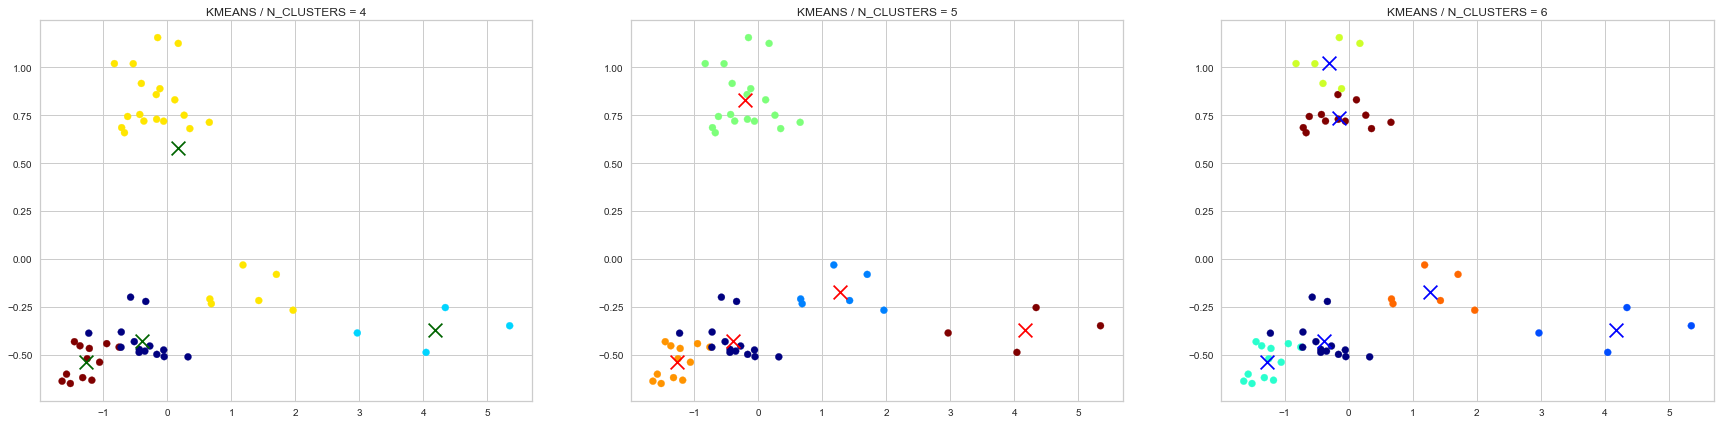

In [131]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,7))

coordinates_centroids= pca3.transform(kmeans_instances[3].cluster_centers_)
ax1.set_title('KMEANS / n_clusters = 4'.upper())
ax1.scatter(X_pca3[:,0], X_pca3[:, 1], c=kmeans_instances[3].labels_, cmap='jet') 
ax1.scatter(coordinates_centroids[:, 0], coordinates_centroids[:, 1], c='darkgreen', marker="x", s=190)

coordinates_centroids = pca3.transform(kmeans_instances[4].cluster_centers_)
ax2.set_title('KMEANS / n_clusters = 5'.upper())
ax2.scatter(X_pca3[:,0], X_pca3[:, 1], c=kmeans_instances[4].labels_, cmap='jet') 
ax2.scatter(coordinates_centroids[:, 0], coordinates_centroids[:, 1], c='red', marker="x", s=190)

coordinates_centroids = pca3.transform(kmeans_instances[5].cluster_centers_)
ax3.set_title('KMEANS / n_clusters = 6'.upper())
ax3.scatter(X_pca3[:,0], X_pca3[:, 1], c=kmeans_instances[5].labels_, cmap='jet') 
ax3.scatter(coordinates_centroids[:, 0], coordinates_centroids[:, 1], c='blue', marker="x", s=190)

# plt.subplots_adjust(wspace=0.3)

<font color="blue"> Clusters avec AgglomerativeClustering</font>

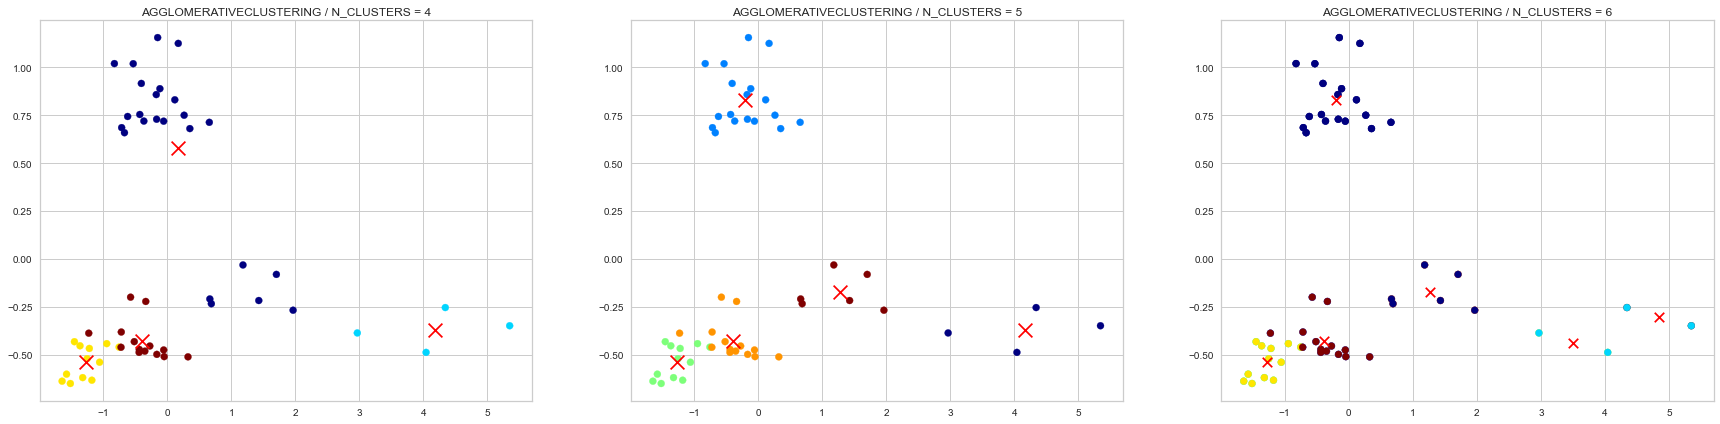

In [132]:
fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(30,7))

nc = NearestCentroid()

estimated_centroids = pca3.transform(nc.fit(X_catalogue_uncolored, ac_4.labels_).centroids_)
ax1.set_title('AgglomerativeClustering / n_clusters = 4'.upper())
ax1.scatter(X_pca3[:,0], X_pca3[:, 1], c=ac_4.labels_, cmap='jet')
ax1.scatter(estimated_centroids[:, 0], estimated_centroids[:, 1], c='red', marker="x", s=190)

estimated_centroids = pca3.transform(nc.fit(X_catalogue_uncolored, ac_5.labels_).centroids_)
ax2.set_title('AgglomerativeClustering / n_clusters = 5'.upper())
ax2.scatter(X_pca3[:,0], X_pca3[:, 1], c=ac_5.labels_, cmap='jet') 
ax2.scatter(estimated_centroids[:, 0], estimated_centroids[:, 1], c='red', marker="x", s=190)

estimated_centroids = pca3.transform(nc.fit(X_catalogue_uncolored, ac_6.labels_).centroids_)
ax3.set_title('AgglomerativeClustering / n_clusters = 6'.upper())
ax3.scatter(X_pca3[:,0], X_pca3[:, 1], c=ac_6.labels_, cmap='jet') 
ax3.scatter(X_pca3[:,0], X_pca3[:, 1], c=ac_4.labels_, cmap='jet')
ax3.scatter(estimated_centroids[:, 0], estimated_centroids[:, 1], c='red', marker="x", s=90)
 
# plt.subplots_adjust(wspace=0.3)

## <font color="blue"> En visusalisant en 2D après une réduction basée sur PCA, le K-Means et l'agglomerative clustering fournissent des résultats assez similaires.  </font>

# <font color="blue"> Après analyse,  nous choisissons k=5 clusters avec le modèle de k-Means car les données y sont mieux regroupées avec PCA</font>

In [133]:
catalogue_uncolored['label'] = kmeans_instances[4].predict(X_catalogue_uncolored)

In [134]:
catalogue_uncolored.label.value_counts()

2    18
0    14
3    12
1     6
4     4
Name: label, dtype: int64

In [135]:
catalogue_uncolored[catalogue_uncolored.label == 0]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,occasion,prix,label
2,Audi,A3 2.0 FSI,150,moyenne,5,5,0,28500,0
3,Audi,A3 2.0 FSI,150,moyenne,5,5,1,19950,0
4,BMW,120i,150,moyenne,5,5,0,35800,0
5,BMW,120i,150,moyenne,5,5,1,25060,0
8,Dacia,Logan 1.6 MPI,90,moyenne,5,5,0,7500,0
21,Mercedes,A200,136,moyenne,5,5,0,25900,0
22,Mercedes,A200,136,moyenne,5,5,1,18130,0
27,Nissan,Almera 1.8,115,moyenne,5,5,0,16450,0
36,Renault,Megane 2.0 16V,135,moyenne,5,5,0,22350,0
37,Renault,Megane 2.0 16V,135,moyenne,5,5,1,15644,0


In [136]:
catalogue_uncolored[catalogue_uncolored.label == 1]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,occasion,prix,label
28,Nissan,Maxima 3.0 V6,200,très longue,5,5,0,30000,1
38,Renault,Vel Satis 3.5 V6,245,très longue,5,5,0,49200,1
39,Renault,Vel Satis 3.5 V6,245,très longue,5,5,1,34440,1
43,Skoda,Superb 2.8 V6,193,très longue,5,5,0,31790,1
52,Volvo,S80 T6,272,très longue,5,5,0,50500,1
53,Volvo,S80 T6,272,très longue,5,5,1,35350,1


In [137]:
catalogue_uncolored[catalogue_uncolored.label == 2]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,occasion,prix,label
10,Fiat,Croma 2.2,147,longue,5,5,0,24780,2
11,Fiat,Croma 2.2,147,longue,5,5,1,17346,2
12,Ford,Mondeo 1.8,125,longue,5,5,0,23900,2
13,Ford,Mondeo 1.8,125,longue,5,5,1,16730,2
14,Honda,FR-V 1.7,125,longue,7,5,0,19550,2
15,Hyundaï,Matrix 1.6,103,longue,7,5,0,15960,2
16,Jaguar,X-Type 2.5 V6,197,longue,5,5,0,37100,2
17,Jaguar,X-Type 2.5 V6,197,longue,5,5,1,25970,2
29,Nissan,Primera 1.6,109,longue,5,5,0,18650,2
32,Renault,Espace 2.0T,165,longue,7,5,0,30350,2


In [138]:
catalogue_uncolored[catalogue_uncolored.label == 3]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,occasion,prix,label
0,Audi,A2 1.4,75,courte,5,5,0,18310,3
1,Audi,A2 1.4,75,courte,5,5,1,12817,3
9,Daihatsu,Cuore 1.0,58,courte,5,3,0,8850,3
18,Kia,Picanto 1.1,65,courte,5,5,0,8990,3
19,Lancia,Ypsilon 1.4 16V,90,courte,5,3,0,13500,3
20,Lancia,Ypsilon 1.4 16V,90,courte,5,3,1,9450,3
25,Mini,Copper 1.6 16V,115,courte,5,5,0,18200,3
26,Mini,Copper 1.6 16V,115,courte,5,5,1,12740,3
30,Peugeot,1007 1.4,75,courte,5,5,0,13750,3
31,Peugeot,1007 1.4,75,courte,5,5,1,9625,3


In [139]:
catalogue_uncolored[catalogue_uncolored.label == 4]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,occasion,prix,label
6,BMW,M5,507,très longue,5,5,0,94800,4
7,BMW,M5,507,très longue,5,5,1,66360,4
23,Mercedes,S500,306,très longue,5,5,0,101300,4
24,Mercedes,S500,306,très longue,5,5,1,70910,4


In [140]:
#Save vechicles by categorie with pickle in order to show its in web interface
categories = []
for label in range(5):
    categories.append(catalogue_uncolored[catalogue_uncolored.label == label] )

with open("vehicle_categories.pkl", 'wb') as file:
    pickle.dump(categories, file)

In [141]:
categories[4]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,occasion,prix,label
6,BMW,M5,507,très longue,5,5,0,94800,4
7,BMW,M5,507,très longue,5,5,1,66360,4
23,Mercedes,S500,306,très longue,5,5,0,101300,4
24,Mercedes,S500,306,très longue,5,5,1,70910,4


<AxesSubplot:xlabel='longueur', ylabel='count'>

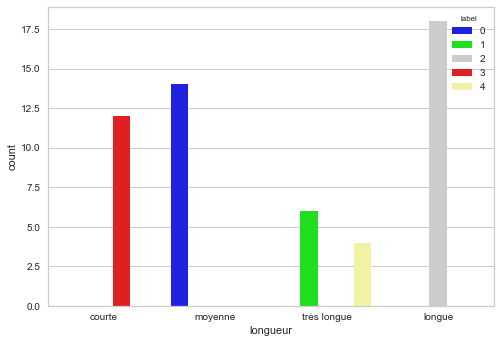

In [142]:
sns.countplot(data=catalogue_uncolored, x="longueur", hue="label", palette=["#00f", "#0f0", "#ccc", "#f00", "#ff9"])

<font color=blue size=5> Les véhicules semblent avoir été regroupés par leur longueur </font>

# Merging 

In [143]:
path_to_CO2 = "./Données communes/CO2.csv"
CO2 = pd.read_csv(path_to_CO2)

path_to_immatriculations = "./Données communes/immatriculations.csv"
immatriculations = pd.read_csv(path_to_immatriculations, encoding="ISO-8859-1")
immatriculations.occasion = np.where(immatriculations.occasion, 1,0)
# immatriculations.marque = immatriculations.marque.str.strip()

path_to_clients = "./Données par groupe/Groupe_TPT_6/Clients_61.csv"
clients = pd.read_csv(path_to_clients, encoding="ISO-8859-1")

## Clustering vehicles in immatriculations

In [144]:
immatriculations.shape

(2000000, 10)

In [145]:
immatriculations.sample(5)

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
1436686,1244 DT 20,Audi,A2 1.4,75,courte,5,5,rouge,0,18310
455710,7137 FE 80,Nissan,Primera 1.6,109,longue,5,5,rouge,0,18650
807276,5378 QR 34,Fiat,Croma 2.2,147,longue,5,5,blanc,0,24780
1956609,177 IB 37,Jaguar,X-Type 2.5 V6,197,longue,5,5,rouge,0,37100
278302,6144 FO 56,BMW,M5,507,très longue,5,5,noir,1,66360


In [146]:
immatriculations.isna().sum()

immatriculation    0
marque             0
nom                0
puissance          0
longueur           0
nbPlaces           0
nbPortes           0
couleur            0
occasion           0
prix               0
dtype: int64

In [147]:
immatriculations.immatriculation.nunique()

1996632

<font color="blue" size=4> On remarque des lignes en  doublon et aussi des doublons au niveau de  la colonne "immatriculation" du dataframe immatriculations
</font>

<font color="blue" size=4> 
Nous les supprimons, car une ligne doublon n'a pas de sens. De même, une même immatriculation dupliquée implique qu'elle pourrait appartenir à deux véhicules différents. Ce qui n'a de sens.
</font>

In [148]:
print("Nombre de doublons dans la colonne immatriculation :", immatriculations.immatriculation.duplicated().sum())
print("Nombre de lignes en doublon : ", immatriculations.duplicated().sum())

Nombre de doublons dans la colonne immatriculation : 3368
Nombre de lignes en doublon :  24


In [149]:
immatriculations = immatriculations.drop_duplicates()
immatriculations.drop(index=immatriculations[immatriculations.immatriculation.duplicated()].index, inplace=True)

In [150]:
# Ajout des marques manquantes pour performer le clustering avec kmeans
puissance_median = int(immatriculations.puissance.median())
longueur_frequent = immatriculations.longueur.mode()[0]
nbPlaces_frequent = immatriculations.nbPlaces.mode()[0]
nbPortes_frequent = immatriculations.nbPortes.mode()[0]
couleur_frequent = immatriculations.couleur.mode()[0]
occasion_frequent = immatriculations.occasion.mode()[0]
prix_median = int(immatriculations.prix.median())

val = ['null', puissance_median, longueur_frequent, nbPlaces_frequent, nbPortes_frequent, couleur_frequent, occasion_frequent, prix_median]

immatriculations.loc[2000000] = ['null', 'Honda']  + val 
immatriculations.loc[2000001] = ['null', 'Hyundaï'] + val

In [151]:
X_immatriculations = pipe_ohe_scaling_catalogue.transform(immatriculations)

In [152]:
X_immatriculations.shape

(1996634, 29)

In [153]:
immatriculations['label'] = kmeans_instances[4].predict(X_immatriculations)

<AxesSubplot:xlabel='label', ylabel='count'>

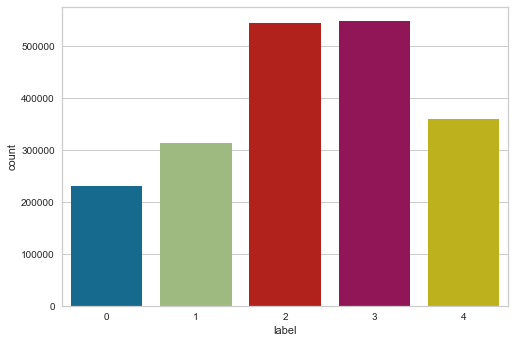

In [154]:
sns.countplot(x=immatriculations.label)

In [155]:
immatriculations.nbPlaces.unique()

array([5], dtype=int64)

<AxesSubplot:xlabel='longueur', ylabel='count'>

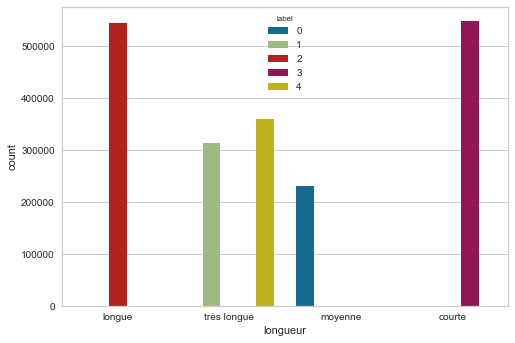

In [156]:
sns.countplot(data=immatriculations, x="longueur", hue="label")

## <font color="blue"> Les véhicules semblent avoir été regroupés par la longeur </font>

## Join

In [157]:
print(clients.shape)

(100000, 7)


In [158]:
print("Nombre de doublons dans la colonne immatriculation :", clients.immatriculation.duplicated().sum())
print("Nombre de lignes en doublon : ", clients.duplicated().sum())

Nombre de doublons dans la colonne immatriculation : 18
Nombre de lignes en doublon :  0


In [159]:
clients.drop(index=clients[clients.immatriculation.duplicated()].index, inplace=True)

In [160]:
clients_immatriculations = clients.merge(immatriculations, on="immatriculation")

In [161]:
print("Nombre de doublons après la jointure : ", clients_immatriculations.duplicated().sum())

Nombre de doublons après la jointure :  0


## EDA de Clients

In [162]:
#Suppression des colonnes venant de immatriculations (sauf la variable cible )
clients_labeled = clients_immatriculations.drop(columns=["immatriculation", "marque",	"nom", "puissance",	"longueur",	"nbPlaces",	"nbPortes",	"couleur",	"occasion", "prix"])
clients_labeled.rename(columns={"2eme voiture" : "VoitureN2"}, inplace=True)

In [163]:
print(clients_labeled.shape)
clients_labeled.sample(5)

(99982, 7)


,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,VoitureN2,label
89898,73,M,512,En Couple,0,true,3
30164,53,F,-1,Seule,3,false,2
11523,42,F,499,En Couple,3,false,4
40472,54,M,210,En Couple,3,false,1
30567,23,M,530,Célibataire,0,false,3


In [164]:
clients_labeled.dtypes

age                   object
sexe                  object
taux                  object
situationFamiliale    object
nbEnfantsAcharge      object
VoitureN2             object
label                  int32
dtype: object

In [165]:
clients_labeled.isin([" ", "?", "N/D", "-1"]).sum()

age                   308
sexe                  310
taux                  322
situationFamiliale    306
nbEnfantsAcharge      316
VoitureN2             205
label                   0
dtype: int64

In [166]:
display("values of sexe column : ", clients_labeled.sexe.value_counts())
print("="*15)
display("values of situationFamiliale column : ", clients_labeled.situationFamiliale.value_counts()) 

'values of sexe column : '

M           68351
F           29363
Masculin      699
Homme         683
Féminin       300
Femme         276
              110
?             106
N/D            94
Name: sexe, dtype: int64

'values of situationFamiliale column : '

En Couple      64052
Célibataire    29725
Seule           4852
Marié(e)         657
Seul             336
N/D              103
                 102
?                101
Divorcée          54
Name: situationFamiliale, dtype: int64

In [167]:
map_sexe = {"M": "Masculin", "F": "Féminin", "Masculin" : "Masculin", "Homme" : "Masculin", "Féminin" : "Féminin", "Femme" : "Féminin"}
map_situationFamiliale = {"En Couple": "En Couple", "Célibataire": "Célibataire", "Seule" : "Célibataire", "Marié(e)" : "En Couple", "Seul" : "Célibataire"}
map_VoitureN2 = {"true": "Oui", "false": "Non"}

clients_labeled.age = pd.to_numeric(clients_labeled.age, errors="coerce")
clients_labeled.taux = pd.to_numeric(clients_labeled.taux, errors="coerce")
clients_labeled.nbEnfantsAcharge = pd.to_numeric(clients_labeled.nbEnfantsAcharge, errors="coerce") 

clients_labeled['VoitureN2'] = clients_labeled['VoitureN2'].map(map_VoitureN2)
clients_labeled.sexe = clients_labeled.sexe.map(map_sexe)
clients_labeled.situationFamiliale = clients_labeled.situationFamiliale.map(map_situationFamiliale)

In [168]:
clients_labeled.isin([" ", "?", "N/D", "-1"]).mean()*100

age                   0.0
sexe                  0.0
taux                  0.0
situationFamiliale    0.0
nbEnfantsAcharge      0.0
VoitureN2             0.0
label                 0.0
dtype: float64

In [169]:
display(clients_labeled.isna().sum())
print()
display(clients_labeled.isin([-1]).sum())

age                   208
sexe                  310
taux                  223
situationFamiliale    360
nbEnfantsAcharge      206
VoitureN2             205
label                   0
dtype: int64

age                   100
sexe                    0
taux                   99
situationFamiliale      0
nbEnfantsAcharge      110
VoitureN2               0
label                   0
dtype: int64

<font color="blue"> Plusieurs colonnes ont des valeurs manquantes mais en très faible proportion. 

Nous faisons le choix de les supprimer.

 </font>

In [170]:
clients_labeled_cleaned = clients_labeled.copy()

In [171]:
clients_labeled_cleaned.dropna(inplace=True)
clients_labeled_cleaned.drop(index = clients_labeled_cleaned[clients_labeled_cleaned.age.isin([-1]) | clients_labeled_cleaned.taux.isin([-1]) | clients_labeled_cleaned.nbEnfantsAcharge.isin([-1])].index, inplace=True)

In [172]:
display(clients_labeled_cleaned.isna().sum())
print()
display(clients_labeled_cleaned.isin([-1]).sum())

age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
VoitureN2             0
label                 0
dtype: int64

age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
VoitureN2             0
label                 0
dtype: int64

<font color="blue"> Premier jeu de données propre </font>

In [173]:
clients_labeled_cleaned.describe(include="all")

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,VoitureN2,label
count,98171.000000,98171,98171.000000,98171,98171.000000,98171,98171.000000
unique,NaN,2,NaN,2,NaN,2,NaN
top,NaN,Masculin,NaN,En Couple,NaN,Non,NaN
freq,NaN,68705,NaN,63801,NaN,85354,NaN
mean,43.770584,NaN,607.820874,NaN,1.247191,NaN,2.246875
std,18.271554,NaN,333.909303,NaN,1.383272,NaN,1.248484
min,18.000000,NaN,150.000000,NaN,0.000000,NaN,0.000000
25%,28.000000,NaN,422.000000,NaN,0.000000,NaN,1.000000
50%,42.000000,NaN,522.000000,NaN,1.000000,NaN,2.000000
75%,56.000000,NaN,822.000000,NaN,2.000000,NaN,3.000000


## Visualisation 

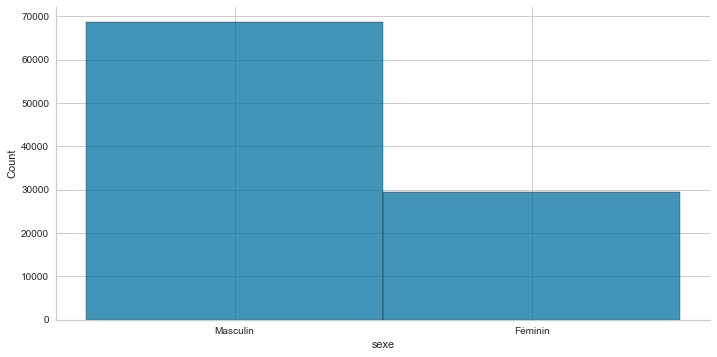

In [174]:
sns.displot(data=clients_labeled_cleaned, x="sexe", kind="hist", aspect=2)

<font color=blue size=5>
On note qu'il y a deux fois plus d'hommes que de femmes
</font>

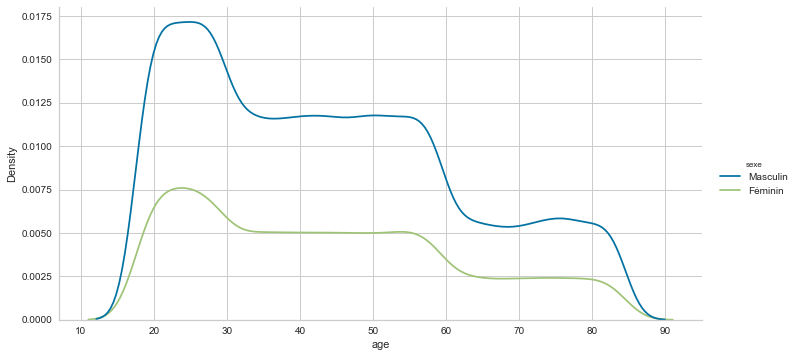

In [175]:
sns.displot(data=clients_labeled_cleaned, x="age", hue="sexe", kind="kde", aspect=2)
plt.show()

<font color=blue size=5> Nous pouvons distinguer 3 catégories d'âge : les moins de 30 ans, les 30-60 ans et les 60-85 ans. </font>

In [176]:
clients_labeled_cleaned['tranche_age'] = clients_labeled_cleaned.age.map(lambda x : 0 if x < 35 else (1 if x>=35 and x<60 else 2))

In [177]:
clients_labeled_cleaned.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,VoitureN2,label,tranche_age
0,62.0,Masculin,1262.0,En Couple,1.0,Non,2,2
1,68.0,Masculin,514.0,En Couple,2.0,Non,2,2
2,26.0,Féminin,181.0,En Couple,4.0,Oui,1,0
3,34.0,Masculin,829.0,Célibataire,0.0,Non,3,0
4,50.0,Masculin,1169.0,En Couple,4.0,Non,4,1


In [178]:
clients_labeled_cleaned.to_pickle('clients_labeled_cleaned_08_03_2023.pkl')